In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

fn = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
import pandas as pd
org_df = pd.read_csv(fn[0])
org_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


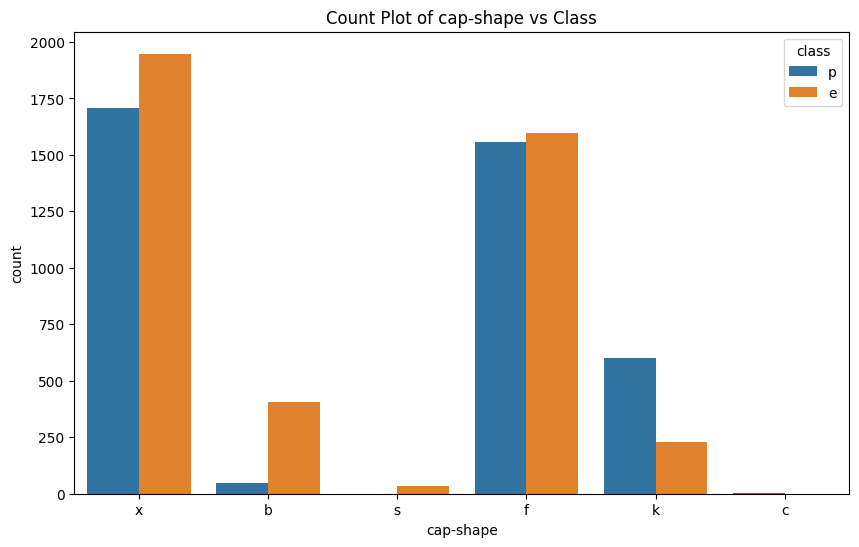

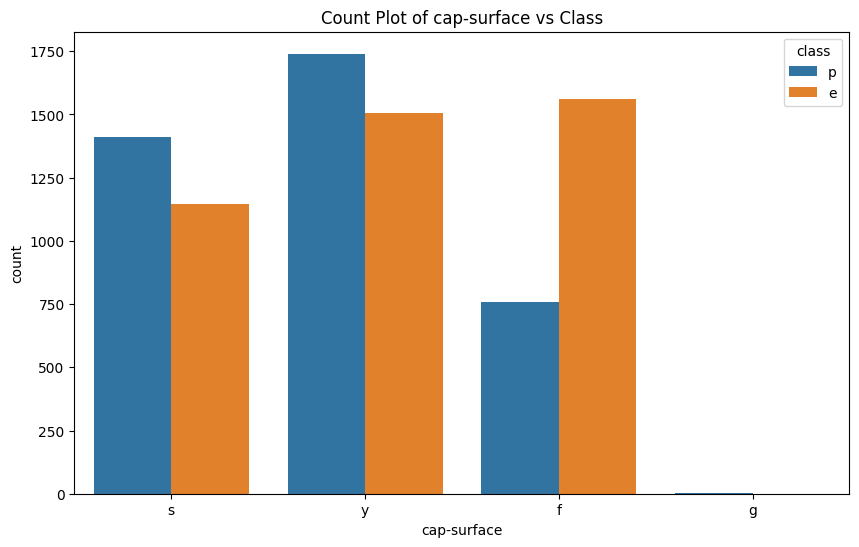

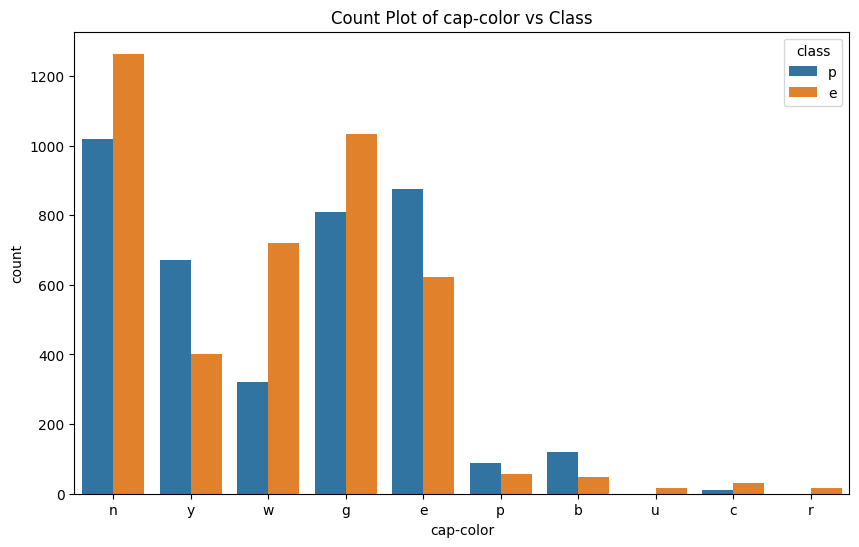

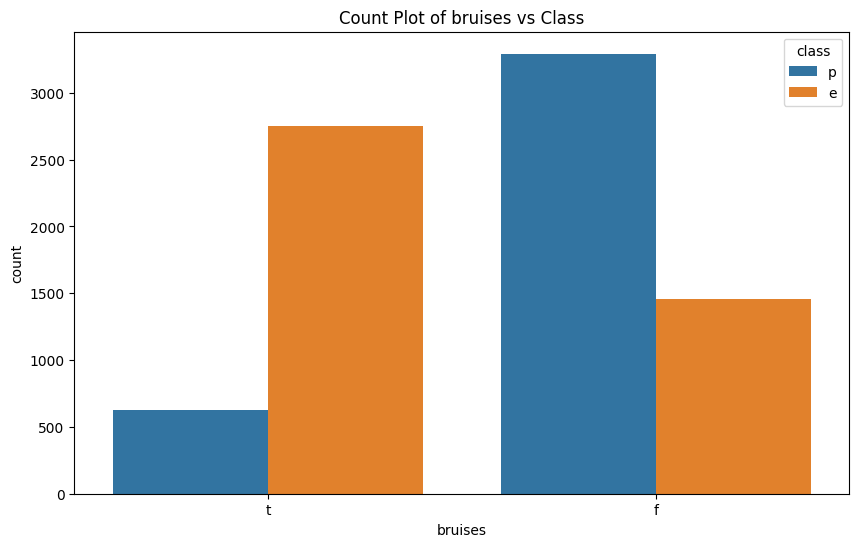

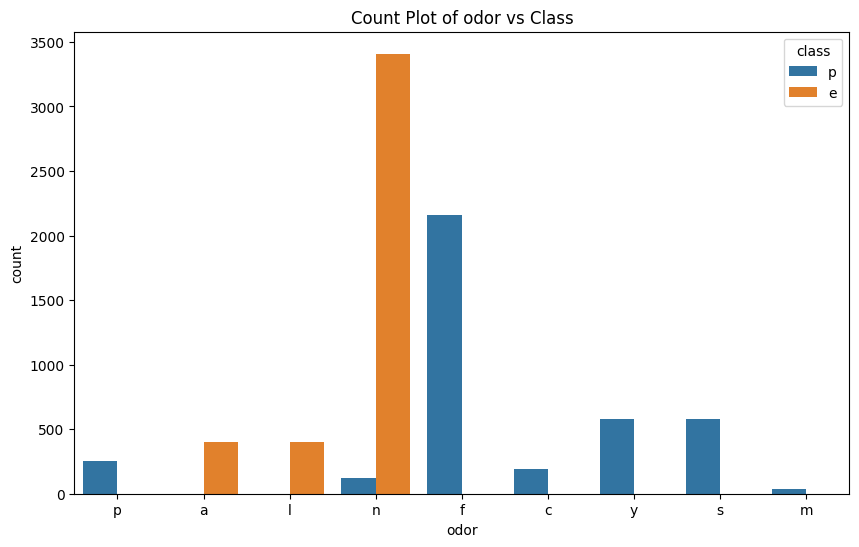

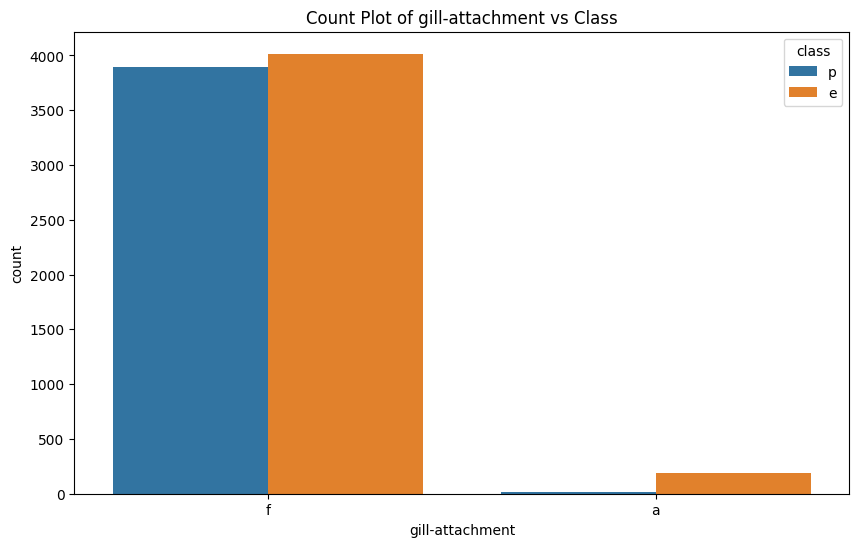

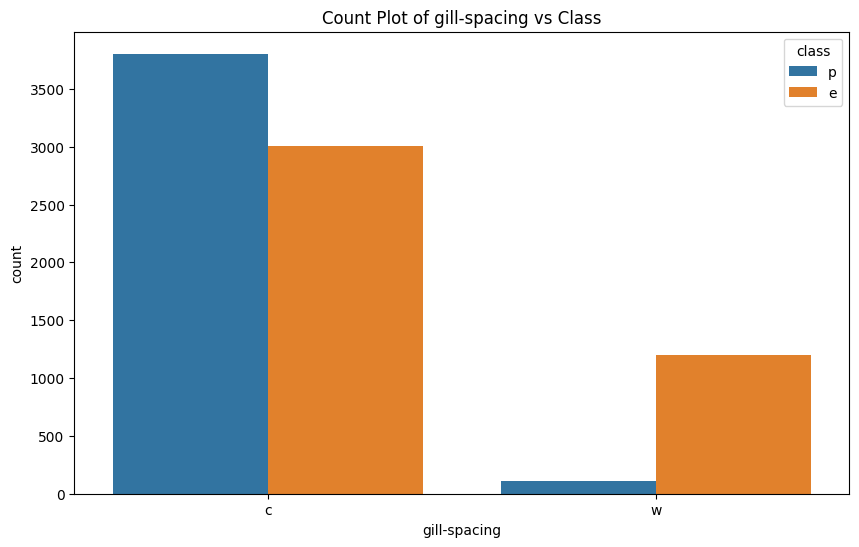

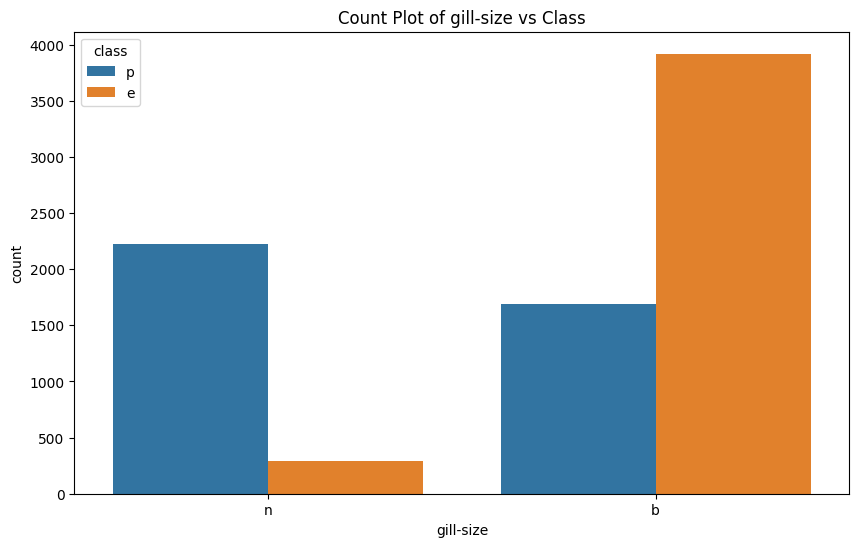

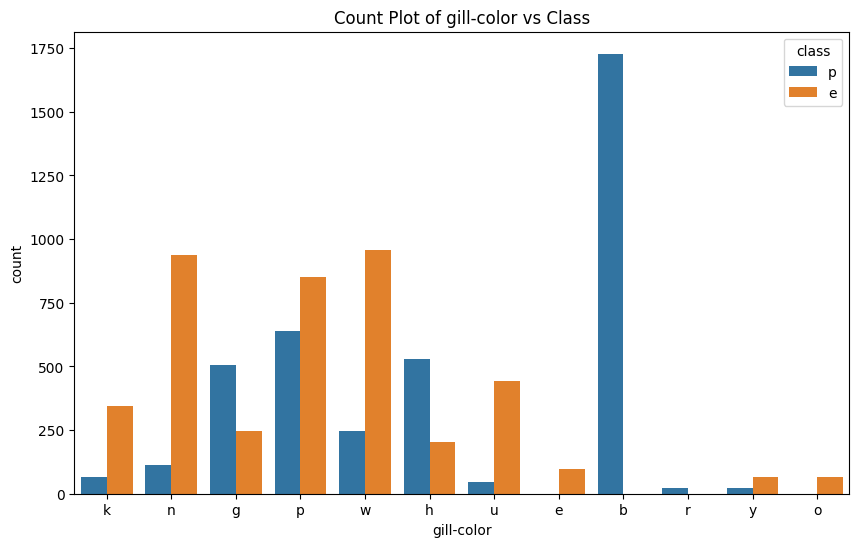

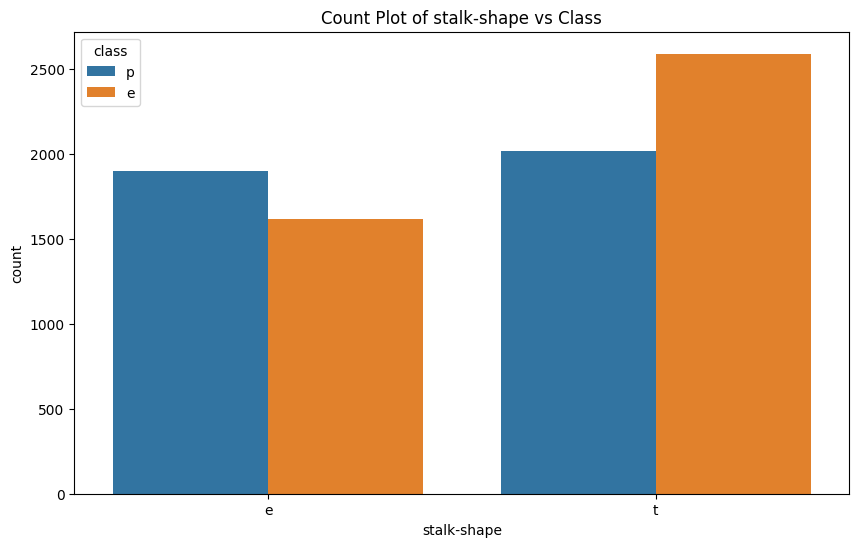

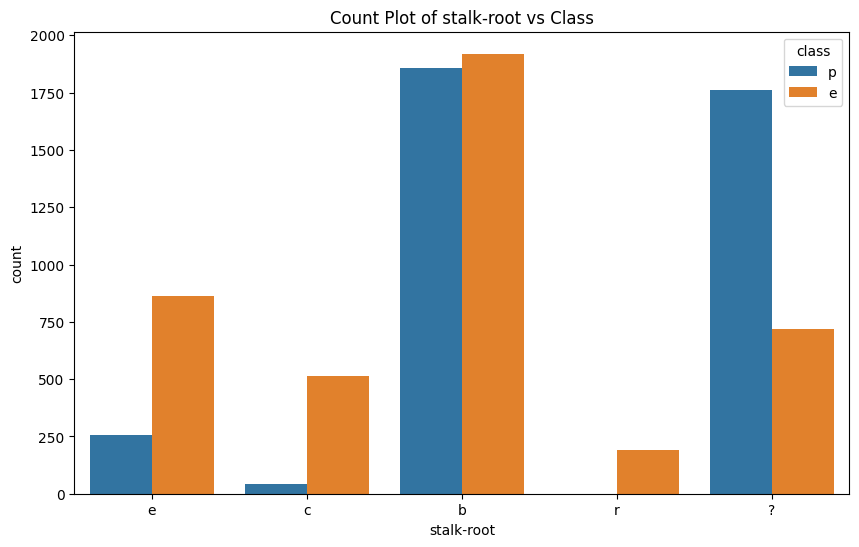

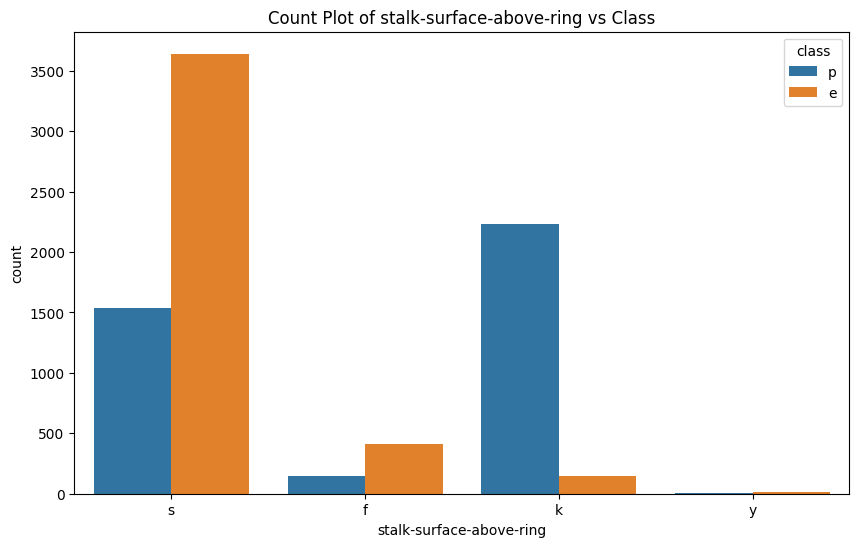

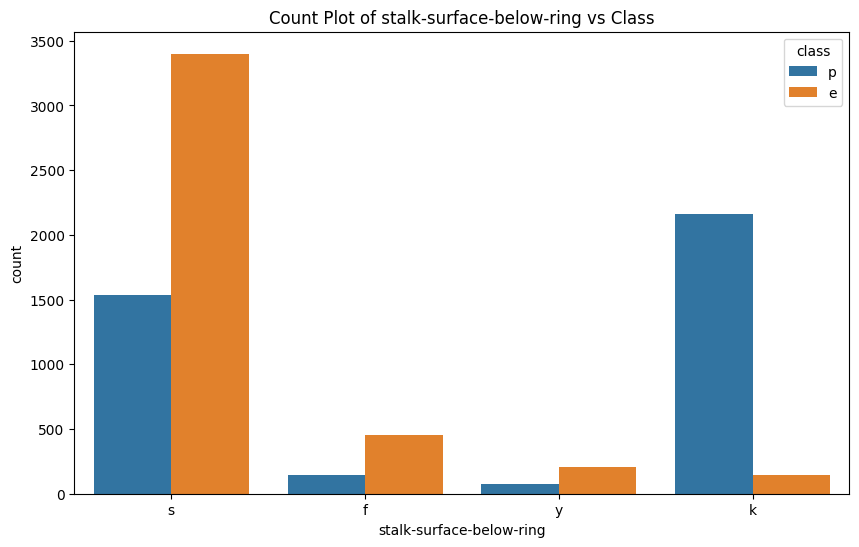

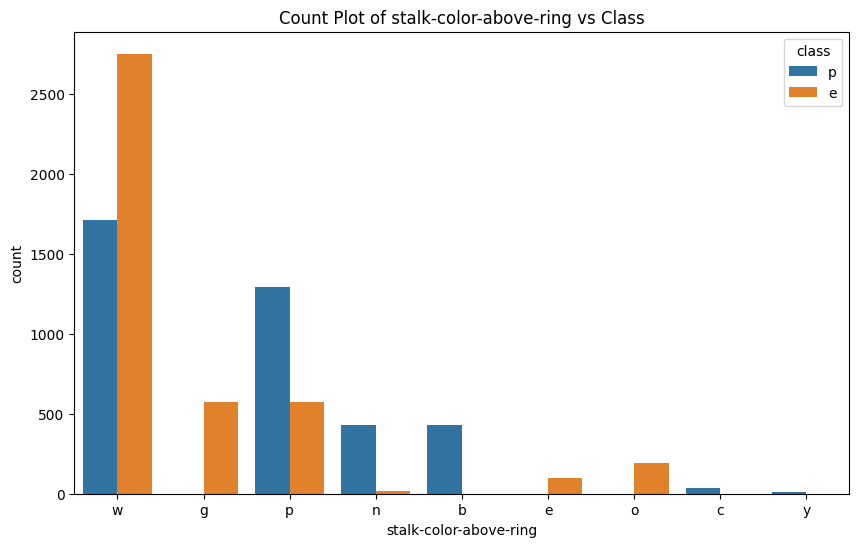

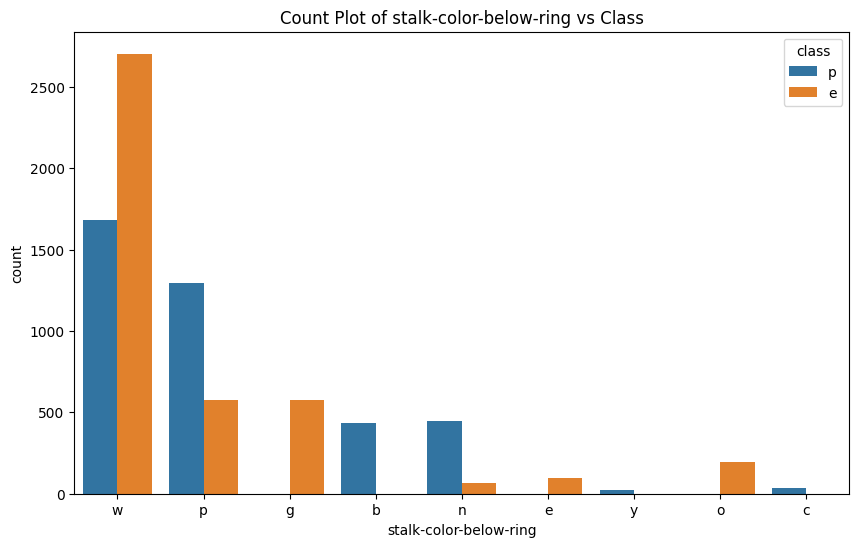

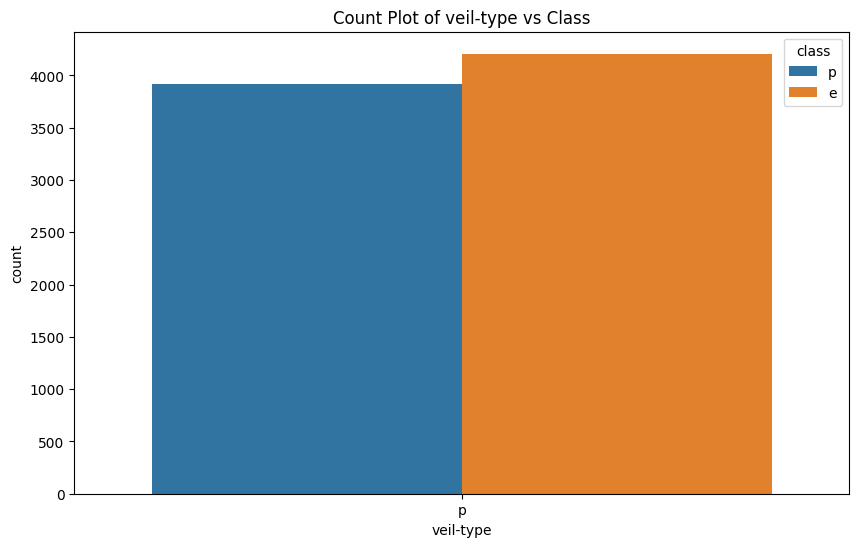

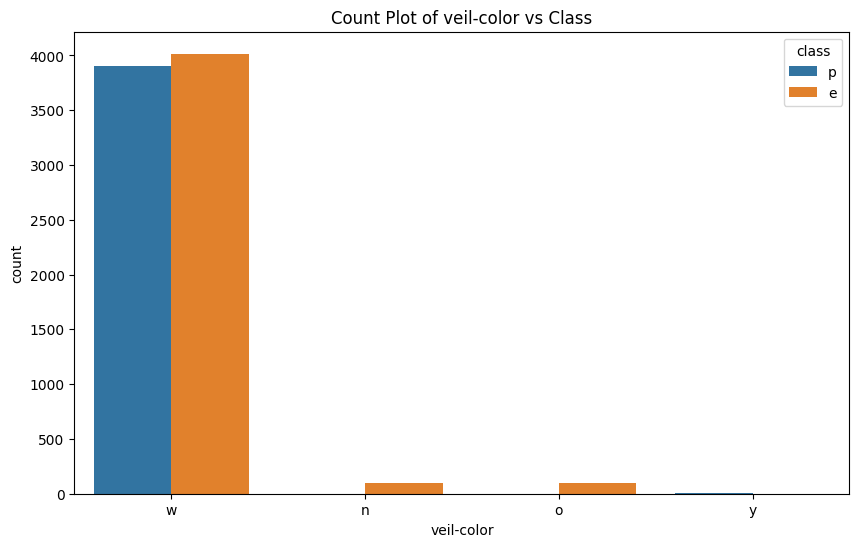

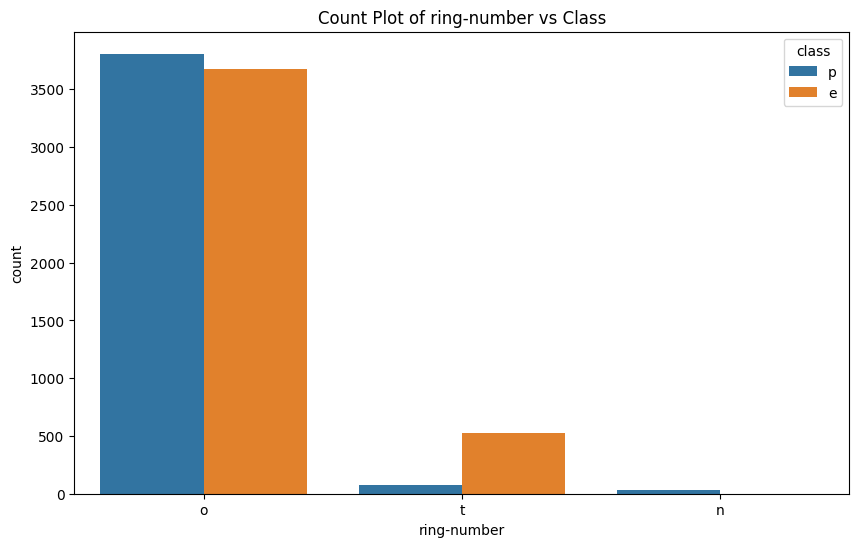

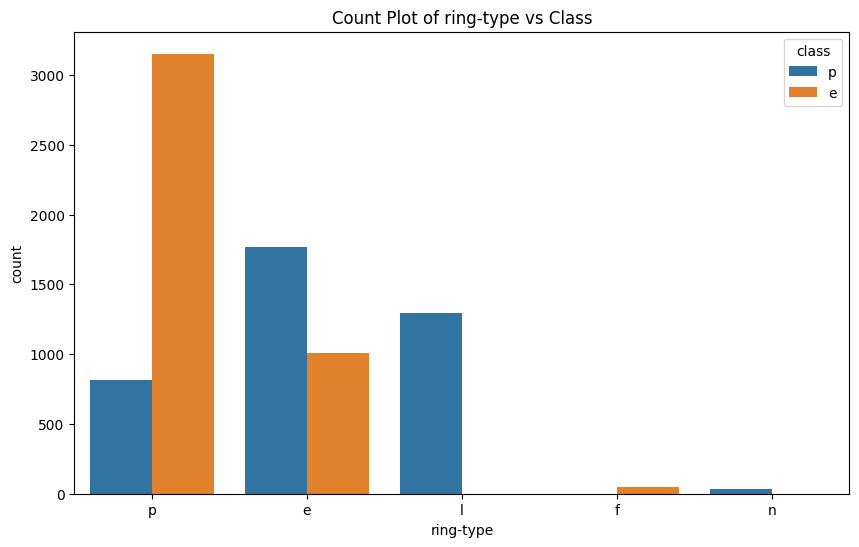

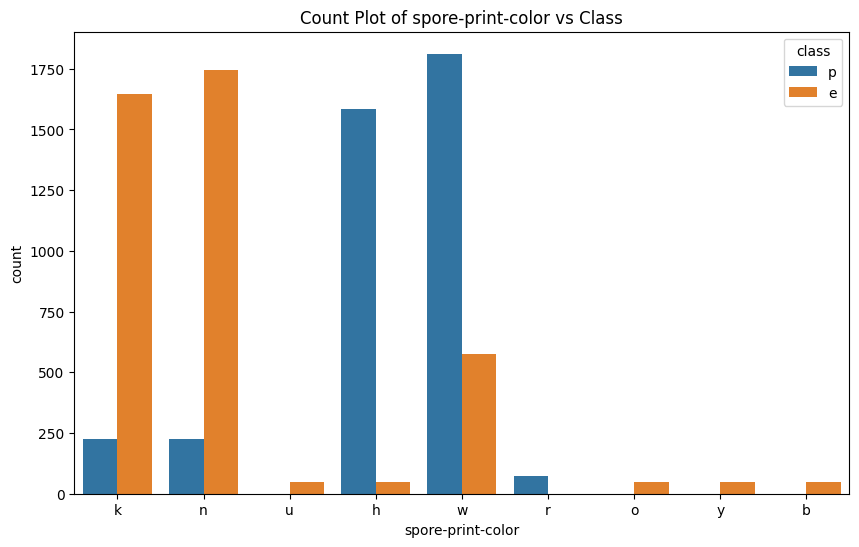

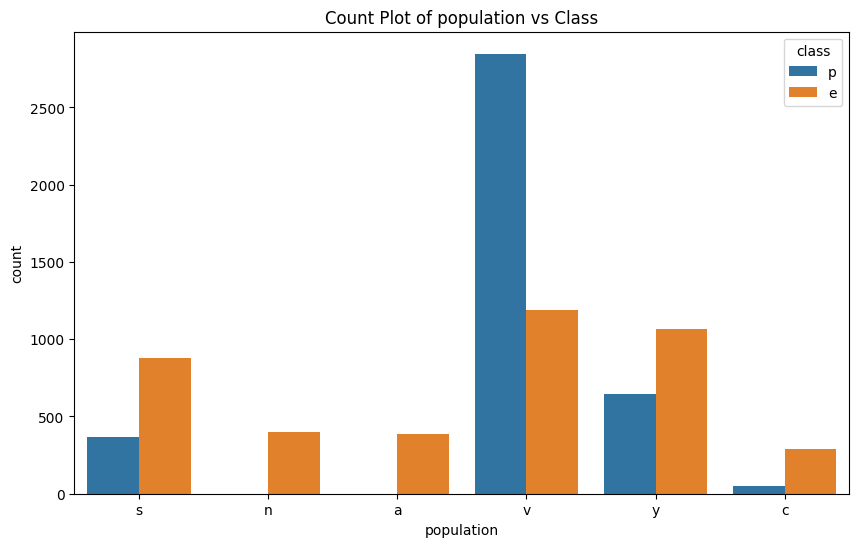

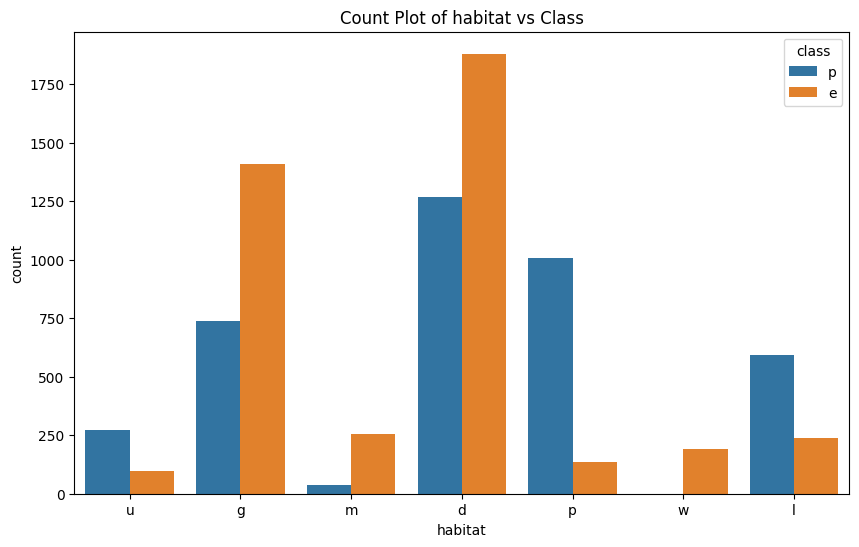

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in org_df.columns:
    if column != 'class':  # Skip the 'class' column itself
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='class', data=org_df)
        plt.title(f'Count Plot of {column} vs Class')
        plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = org_df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    org_df[col] = le.fit_transform(org_df[col])
    label_encoders[col] = le

    
org_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [5]:
from sklearn.model_selection import train_test_split

# First, split the data into train and temp (which will be split into validation and test)
train_df, temp_df = train_test_split(org_df, test_size=0.4, stratify=org_df['class'], random_state=42)

# Now split the temp_df into validation and test
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['class'], random_state=42)

# Display the sizes of the splits
print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

Train size: 4874, Validation size: 1625, Test size: 1625


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Separate features and target
x_train = train_df.drop('class', axis=1)
y_train = train_df['class']
x_test = test_df.drop('class', axis=1)
y_test = test_df['class']
x_val = val_df.drop('class', axis=1)
y_val = val_df['class']

# Set up the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Evaluate the best model on the validation data
y_val_pred = best_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")


Test Accuracy: 1.0
Validation Accuracy: 1.0


In [7]:
type(best_model)

sklearn.tree._classes.DecisionTreeClassifier

In [8]:
# y_train

In [9]:
from sklearn.tree import export_text

text_representation = export_text(best_model, feature_names=x_train.columns.tolist())
print(text_representation)

|--- gill-color <= 3.50
|   |--- population <= 3.50
|   |   |--- spore-print-color <= 1.50
|   |   |   |--- class: 1
|   |   |--- spore-print-color >  1.50
|   |   |   |--- habitat <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- habitat >  0.50
|   |   |   |   |--- class: 0
|   |--- population >  3.50
|   |   |--- stalk-root <= 2.00
|   |   |   |--- stalk-surface-below-ring <= 0.50
|   |   |   |   |--- habitat <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- habitat >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- stalk-surface-below-ring >  0.50
|   |   |   |   |--- class: 1
|   |   |--- stalk-root >  2.00
|   |   |   |--- class: 0
|--- gill-color >  3.50
|   |--- spore-print-color <= 1.50
|   |   |--- odor <= 3.50
|   |   |   |--- class: 1
|   |   |--- odor >  3.50
|   |   |   |--- class: 0
|   |--- spore-print-color >  1.50
|   |   |--- gill-size <= 0.50
|   |   |   |--- stalk-color-below-ring <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- stal

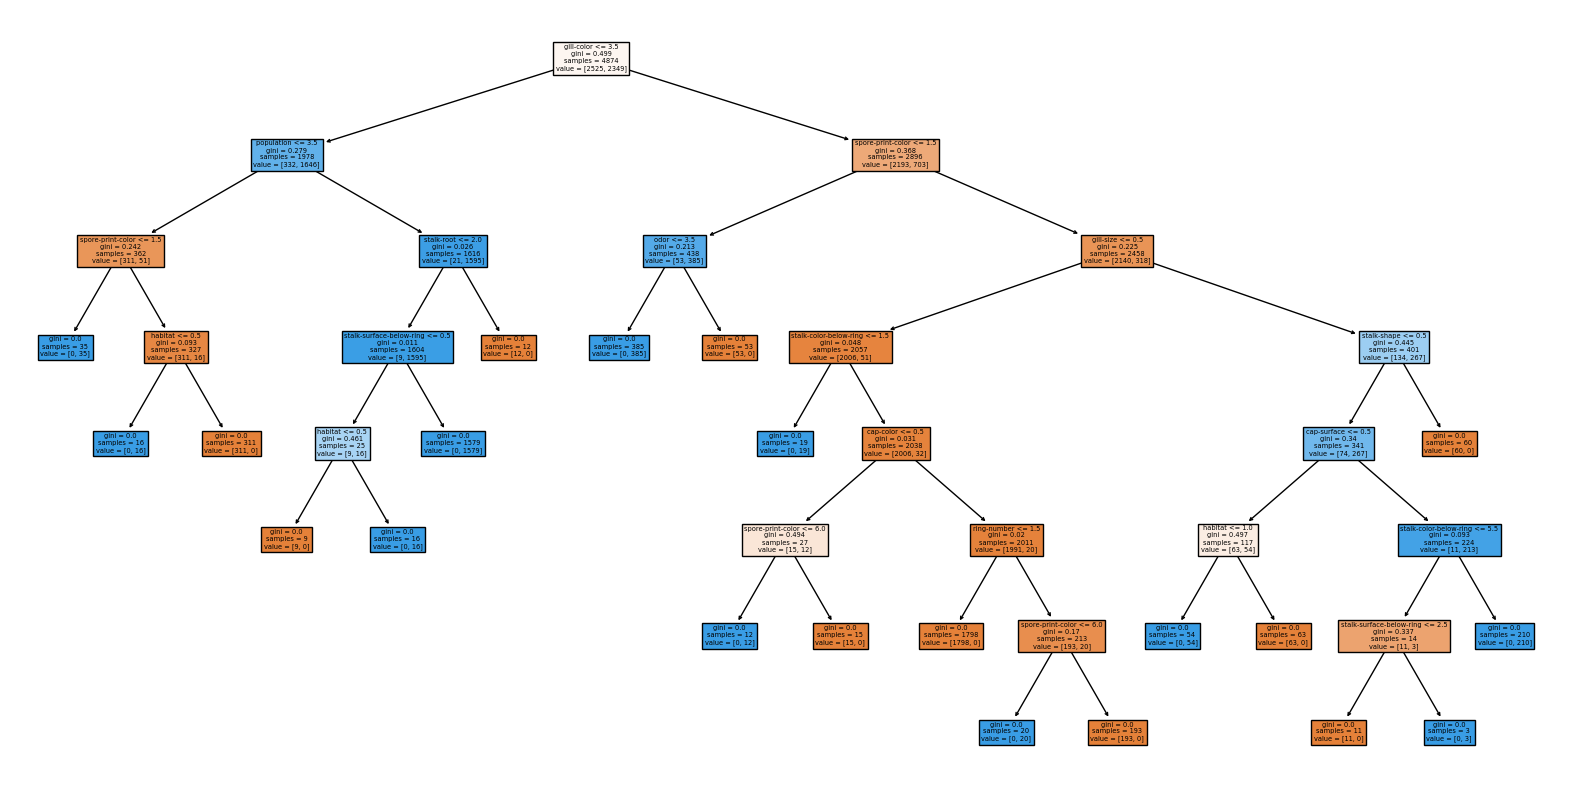

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(best_model, feature_names=x_train.columns,
               filled=True)
plt.show()

In [11]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.3 MB/s eta 0:00:00
